<a href="https://colab.research.google.com/github/fofojaramillo/maestria-propedeuticos/blob/main/Proyecto_Estaditica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Trabajo realizado por Rodolfo Armando Jaramillo Ruiz y Miguel Angel Guerrero Espinoza

# Introducción

La detección de fraudes es de vital importancia en el contexto de los pagos digitales, dado que el crecimiento de las transacciones electrónicas ha propiciado un aumento en los intentos de fraude perpetrados por ciberdelincuentes. Para garantizar la seguridad de las transacciones y proteger los fondos de las personas, numerosos bancos han implementado métodos avanzados de detección de fraudes y medidas de seguridad.

Este proyecto se enfoca en la aplicación de métodos estadísticos para la detección de fraudes en el ámbito de los pagos digitales. Mediante el análisis de datos y la identificación de indicadores relevantes, buscamos desarrollar un análisis estadístico inferencial que contribuya a proteger los sistemas financieros y a garantizar la integridad de las transacciones electrónicas.

# Problema

Teniendo la población de todas las transacciones hechas con una cuenta de banco. Tomamos una muestra aleatoria dentro de esta población de tamaño *n = 1000000* con los atributos (variables) enumeradas a continuación:

La base de datos utilizada consta de los siguientes variables:
- **distance_from_home**:  La distancia desde la casa en donde esta registrada la cuenta, hasta donde ocurrió la transacción.
- **distance_from_last_transaction**: La distancia desde la última transacción ocurrida, hasta esta transacción.
- **ratio_to_median_purchase_price**: Proporción del precio de compra de la transacción con respecto al precio medio de compras del usuario.
- **repeat_retailer**:  ¿Es la transacción realizada por el mismo comerciante?
- **used_chip**: ¿La transacción se realizó a través del chip de la tarjeta de crédito?
- **used_pin_number**: ¿La transacción se realizó utilizando un número PIN?
- **online_order**: ¿La transacción es un pedido en línea?
- **fraud**: ¿La transacción es fraudulenta?

El desafío principal radica en identificar los patrones y anomalías que indiquen posibles casos de fraude. Para abordar este problema, deberemos realizar un análisis exhaustivo de los datos y aplicar técnicas estadísticas.
A partir de estos datos se tratará de encontrar indicadores para detectar fraude.

# Objetivos
- Identificar los principales indicadores que generan un comportamiento atípico en los datos, lo que nos permitirá distinguir entre transacciones legítimas y fraudulentas
- Diseñar un una pequeña propuesta de supuestos que si se cumplen se tomen medidas precautorias para evitar el fraude.

# Recopilación y Limpieza de los datos

Necesitamos una descripción de los valores de la tabla para saber qué tipo de limpieza utilizaremos en los datos.


In [192]:
#Importamos las Librerias que utilizaremos en este proyecto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [ ]:
#Llamamos a la Base de Datos de nuestro problema
cardTrans = pd.read_csv('/content/card_transdata.csv')

### Observamos los valores de nuestro DataFrame

In [ ]:
cardTrans

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
114,1.115881,0.170237,4.127313,0.0,0.0,0.0,0.0,1.0
159,1.379553,0.056486,4.871943,0.0,0.0,0.0,0.0,1.0
237,1.536921,8.049939,13.334844,0.0,0.0,0.0,0.0,1.0
817,0.633633,1.406518,4.086039,0.0,0.0,0.0,1.0,1.0
896,0.669206,0.812729,6.944422,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
999586,1.656501,1.271707,6.948868,0.0,0.0,0.0,1.0,1.0
999596,0.431809,57.250174,0.283123,0.0,0.0,0.0,1.0,1.0
999603,0.826296,0.241470,4.946267,0.0,0.0,0.0,0.0,1.0
999667,0.879875,1.381682,5.375341,0.0,1.0,0.0,1.0,1.0


In [144]:
cardTrans.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000


**CONCLUSIONES**: 
- Tenemos que separar nuestro DataFrame en transacciones Fraudulentas y No Fraudulentas
- Nuestro DataFrame cuenta con bastantes valores atípicos en sus extremos, tenemos que filtrarlos

### Separación de DataFrames

Recordando nuestro primer objetivo, separamos nuestro DataFrame en dos tablas:
- Transacciones Fraudulentas
- Transacciones NO Fraudulentas

In [145]:
# Filtrar las transacciones fraudulentas y no fraudulentas
fraudulent_transactions = cardTrans.loc[cardTrans['fraud'] == 1.0]
non_fraudulent_transactions = cardTrans.loc[cardTrans['fraud'] == 0.0]

In [146]:
fraudulent_transactions

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,0.0,0.0,1.0,1.0
24,3.803057,67.241081,1.872950,0.0,0.0,1.0,1.0
29,15.694986,175.989182,0.855623,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,0.0,0.0,1.0,1.0
999916,167.139756,0.282253,0.308468,0.0,0.0,1.0,1.0
999919,124.640118,0.004416,0.434885,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,0.0,0.0,1.0,1.0


In [147]:
non_fraudulent_transactions

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,0.0,0.0,1.0,0.0


### Filtramos nuestro DataFrame

Tomamos los valores dentro del rango [*Quartil3 - Quartil1*] para eliminar algunos de los valores extremos 

In [148]:
# Calcular los límites del rango del primer y tercer cuartil
qx, qy = 25,75

fraudulent_qx = np.percentile(fraudulent_transactions['distance_from_home'], qx)
fraudulent_qy = np.percentile(fraudulent_transactions['distance_from_home'], qy)

non_fraudulent_qx = np.percentile(non_fraudulent_transactions['distance_from_home'], qx)
non_fraudulent_qy = np.percentile(non_fraudulent_transactions['distance_from_home'], qy)

# Filtrar los DataFrames para mantener solo las entradas dentro del rango del primer y tercer cuartil
fraudulent_filtered = fraudulent_transactions.loc[
    (fraudulent_transactions['distance_from_home'] >= fraudulent_qx) &
    (fraudulent_transactions['distance_from_home'] <= fraudulent_qy)
].copy()

non_fraudulent_filtered = non_fraudulent_transactions.loc[
    (non_fraudulent_transactions['distance_from_home'] >= non_fraudulent_qx) &
    (non_fraudulent_transactions['distance_from_home'] <= non_fraudulent_qy)
].copy()

In [149]:
fraudulent_filtered

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
29,15.694986,175.989182,0.855623,0.0,0.0,1.0,1.0
35,26.711462,1.552008,4.603601,1.0,0.0,1.0,1.0
36,10.664474,1.565769,4.886521,0.0,0.0,1.0,1.0
48,21.126116,0.271987,6.081771,0.0,0.0,1.0,1.0
101,9.598401,0.454556,6.084829,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
999883,14.850909,7.218322,10.680334,1.0,0.0,1.0,1.0
999902,70.272698,0.307762,14.038341,0.0,0.0,1.0,1.0
999908,45.296658,0.882736,8.856861,0.0,0.0,1.0,1.0
999939,51.412900,3.429330,29.914254,0.0,0.0,1.0,1.0


In [150]:
non_fraudulent_filtered

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,used_chip,used_pin_number,online_order,fraud
1,10.829943,0.175592,1.294219,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,0.0,0.0,1.0,0.0
5,5.586408,13.261073,0.064768,0.0,0.0,0.0,0.0
7,4.848247,0.320735,1.273050,0.0,1.0,0.0,0.0
9,8.839047,2.970512,2.361683,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
999990,20.334489,11.437333,0.699527,1.0,0.0,1.0,0.0
999992,9.844674,0.250108,0.814046,0.0,0.0,1.0,0.0
999993,4.846253,2.844450,0.867740,0.0,0.0,1.0,0.0
999996,19.872726,2.683904,2.778303,1.0,0.0,0.0,0.0


Con estos tratamientos nuestros valores estan listos para ser manipulados

Se sacan estadisticas generales de la primera tabla.

1.   Elemento de la lista
2.   Elemento de la lista



# Estadística Descriptiva

Observando que tenemos varias variables binarias. Vamos a hacer un último tratamiento para seleccionar a las variables No Binarias para su descripción.

In [168]:
no_binary = ['distance_from_home',	'distance_from_last_transaction',	'ratio_to_median_purchase_price']
binary = ['used_chip',	'used_pin_number',	'online_order',	'fraud']

In [153]:
non_fraudulent_filtered[no_binary].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,456299.000000,456299.000000,456299.000000
mean,11.001595,4.326664,1.448508
std,5.555356,17.827229,2.007155
min,3.828942,0.000342,0.006125
25%,6.245352,0.293283,0.452503
50%,9.673847,0.984873,0.918794
75%,14.965804,3.278475,1.804003
max,24.158057,2938.197853,168.137909


In [152]:
fraudulent_filtered[no_binary].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,43701.000000,43701.000000,43701.000000
mean,23.666612,14.541680,7.178425
std,21.369452,51.958962,5.745590
min,4.585791,0.000488,0.011966
25%,8.531036,0.339154,4.535622
50%,15.454219,1.218710,5.698147
75%,30.931362,5.058658,8.147465
max,101.108710,1872.446884,266.689692


### Análisis comparativo

**CONCLUSIONES**:
1. Ambas distancias son en promedio considerablemente mayores en los casos de fraude
2. Las transacciones hechas por fraude son considerablemente mayores a las realizadas normalmente
3. Las disperciones de los tres indicadores son considerablemente mayores para los casos de fraude 

## Analizamos las disperciones de nuestros tres indicadores continuos

### **Distance_from_home**

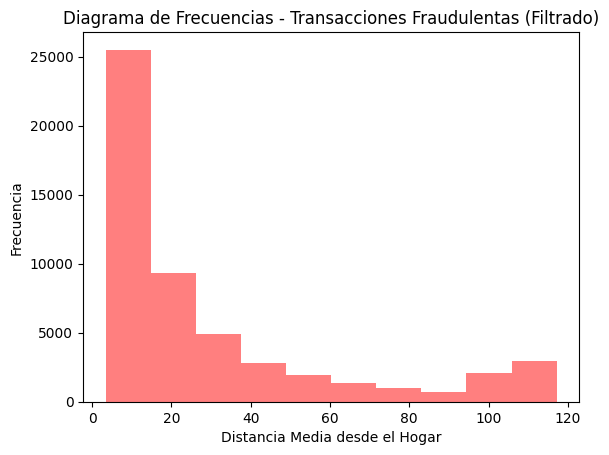

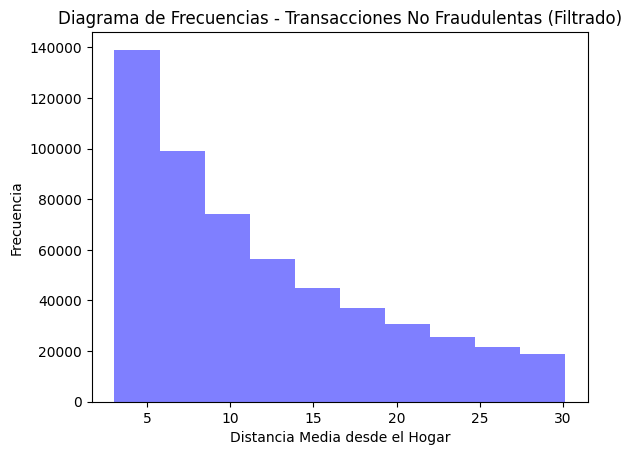

In [ ]:
# Crear diagrama de frecuencias para fraudulent_filtered
plt.hist(fraudulent_filtered['distance_from_home'], bins=10, color='red', alpha=0.5)
plt.xlabel('Distancia Media desde el Hogar')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Frecuencias - Transacciones Fraudulentas (Filtrado)')
plt.show()

# Crear diagrama de frecuencias para non_fraudulent_filtered
plt.hist(non_fraudulent_filtered['distance_from_home'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Distancia Media desde el Hogar')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Frecuencias - Transacciones No Fraudulentas (Filtrado)')
plt.show()


### **Distance_from_last_transaction**

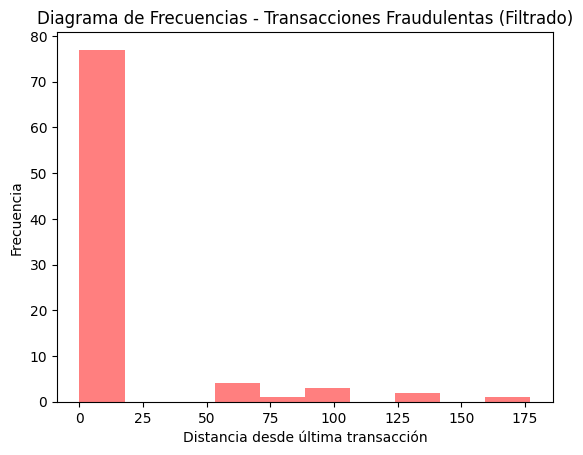

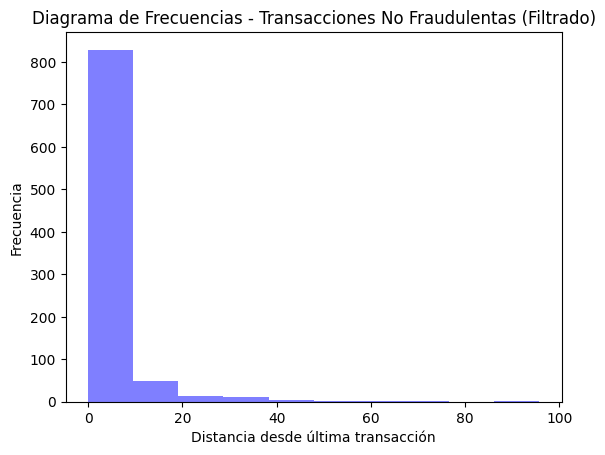

In [182]:
# Calcular los límites del rango del primer y tercer cuartil
qx, qy = 0,0.1

fraudulent_qx = np.percentile(fraudulent_transactions['distance_from_home'], qx)
fraudulent_qy = np.percentile(fraudulent_transactions['distance_from_home'], qy)

non_fraudulent_qx = np.percentile(non_fraudulent_transactions['distance_from_home'], qx)
non_fraudulent_qy = np.percentile(non_fraudulent_transactions['distance_from_home'], qy)

# Filtrar los DataFrames para mantener solo las entradas dentro del rango del primer y tercer cuartil
fraudulent_filtered = fraudulent_transactions.loc[
    (fraudulent_transactions['distance_from_home'] >= fraudulent_qx) &
    (fraudulent_transactions['distance_from_home'] <= fraudulent_qy)
].copy()

non_fraudulent_filtered = non_fraudulent_transactions.loc[
    (non_fraudulent_transactions['distance_from_home'] >= non_fraudulent_qx) &
    (non_fraudulent_transactions['distance_from_home'] <= non_fraudulent_qy)
].copy()
# Crear diagrama de frecuencias para fraudulent_filtered
plt.hist(fraudulent_filtered['distance_from_last_transaction'], bins=10, color='red', alpha=0.5)
plt.xlabel('Distancia desde última transacción')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Frecuencias - Transacciones Fraudulentas (Filtrado)')
plt.show()

# Crear diagrama de frecuencias para non_fraudulent_filtered
plt.hist(non_fraudulent_filtered['distance_from_last_transaction'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Distancia desde última transacción')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Frecuencias - Transacciones No Fraudulentas (Filtrado)')
plt.show()

### **Ratio_to_median_purchase_price**

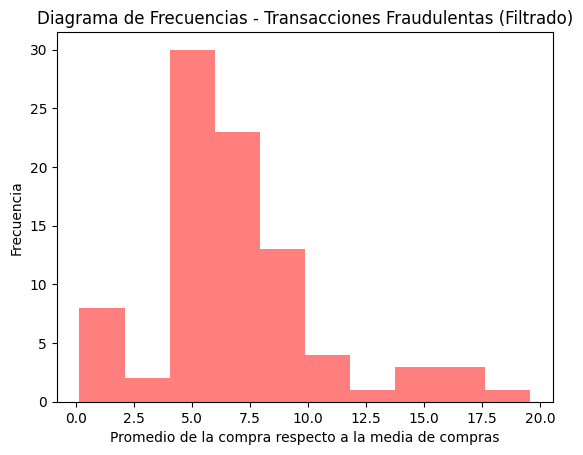

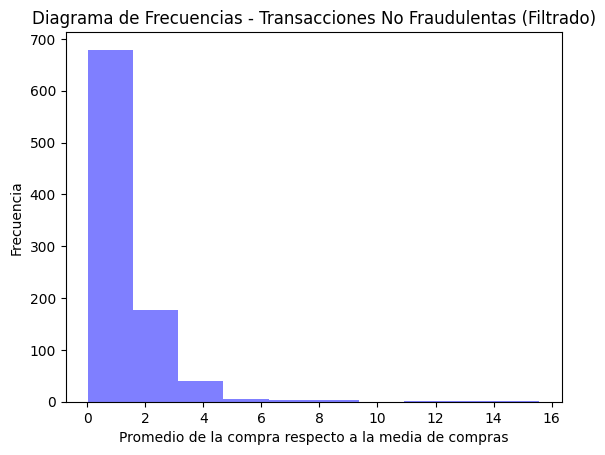

In [184]:
# Crear diagrama de frecuencias para fraudulent_filtered
plt.hist(fraudulent_filtered['ratio_to_median_purchase_price'], bins=10, color='red', alpha=0.5)
plt.xlabel('Promedio de la compra respecto a la media de compras')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Frecuencias - Transacciones Fraudulentas (Filtrado)')
plt.show()

# Crear diagrama de frecuencias para non_fraudulent_filtered
plt.hist(non_fraudulent_filtered['ratio_to_median_purchase_price'], bins=10, color='blue', alpha=0.5)
plt.xlabel('Promedio de la compra respecto a la media de compras')
plt.ylabel('Frecuencia')
plt.title('Diagrama de Frecuencias - Transacciones No Fraudulentas (Filtrado)')
plt.show()

**CONCLUSIÓN**:
- Las distribuciones de nuestros indicadores continuos se aproximan a una exponencial

# Análisis estadístico inferencial

Utilizaremos la función de Correlación Lineal para conocer la relación entre las variables binarias. Para descubrir cuál de ellas tiene una mayor correlación con el Fraude.

In [187]:
# Calcular los límites del rango del primer y tercer cuartil
qx, qy = 25, 75

fraudulent_qx = np.percentile(fraudulent_transactions['distance_from_home'], qx)
fraudulent_qy = np.percentile(fraudulent_transactions['distance_from_home'], qy)

non_fraudulent_qx = np.percentile(non_fraudulent_transactions['distance_from_home'], qx)
non_fraudulent_qy = np.percentile(non_fraudulent_transactions['distance_from_home'], qy)

# Filtrar los DataFrames para mantener solo las entradas dentro del rango del primer y tercer cuartil
fraudulent_filtered = fraudulent_transactions.loc[
    (fraudulent_transactions['distance_from_home'] >= fraudulent_qx) &
    (fraudulent_transactions['distance_from_home'] <= fraudulent_qy)
].copy()

non_fraudulent_filtered = non_fraudulent_transactions.loc[
    (non_fraudulent_transactions['distance_from_home'] >= non_fraudulent_qx) &
    (non_fraudulent_transactions['distance_from_home'] <= non_fraudulent_qy)
].copy()

In [188]:
# Definir los rangos de distancias
bins = 300
# Agregar una columna con los rangos de distancia para cada DataFrame
fraudulent_filtered['distance_range'] = pd.cut(fraudulent_filtered['distance_from_home'], bins=bins)
non_fraudulent_filtered['distance_range'] = pd.cut(non_fraudulent_filtered['distance_from_home'], bins=bins)

# Crear tabla de frecuencias para fraudulent_filtered
fraudulent_table = fraudulent_filtered.groupby('distance_range')[binary].sum()

# Crear tabla de frecuencias para non_fraudulent_filtered
non_fraudulent_table = non_fraudulent_filtered.groupby('distance_range')[binary].sum()


Dividimos el rango de la Distancia en segmentos y contamos la cantidad de veces que aparecen las variables binarias en cada segmento. Colocamos la información en Tablas.

In [190]:
fraudulent_table

,used_chip,used_pin_number,online_order,fraud
distance_range,,,,
"(4.489, 4.908]",375.0,3.0,1121.0,1126.0
"(4.908, 5.229]",354.0,0.0,1056.0,1061.0
"(5.229, 5.551]",332.0,0.0,1004.0,1010.0
"(5.551, 5.873]",346.0,3.0,991.0,998.0
"(5.873, 6.195]",301.0,3.0,903.0,913.0
...,...,...,...,...
"(99.5, 99.822]",9.0,0.0,22.0,22.0
"(99.822, 100.143]",7.0,0.0,44.0,46.0
"(100.143, 100.465]",5.0,1.0,105.0,109.0


In [191]:
non_fraudulent_table

,used_chip,used_pin_number,online_order,fraud
distance_range,,,,
"(3.809, 3.897]",1269.0,390.0,2276.0,0.0
"(3.897, 3.964]",1288.0,357.0,2263.0,0.0
"(3.964, 4.032]",1292.0,399.0,2290.0,0.0
"(4.032, 4.1]",1248.0,356.0,2216.0,0.0
"(4.1, 4.168]",1312.0,377.0,2326.0,0.0
...,...,...,...,...
"(23.819, 23.887]",244.0,66.0,394.0,0.0
"(23.887, 23.955]",196.0,48.0,378.0,0.0
"(23.955, 24.023]",216.0,64.0,390.0,0.0


### **Gráfica de la Correlación del Fraude**

Creamos un gráfica tipo *Scatter* para observar la Correlación que tiene el Fraude con "El uso de chips" y "Ordenes en línea"

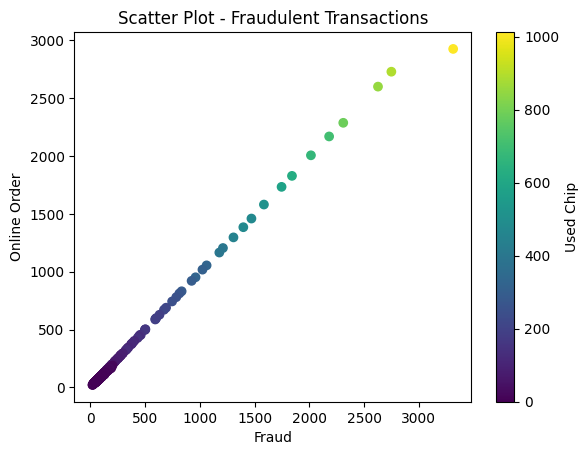

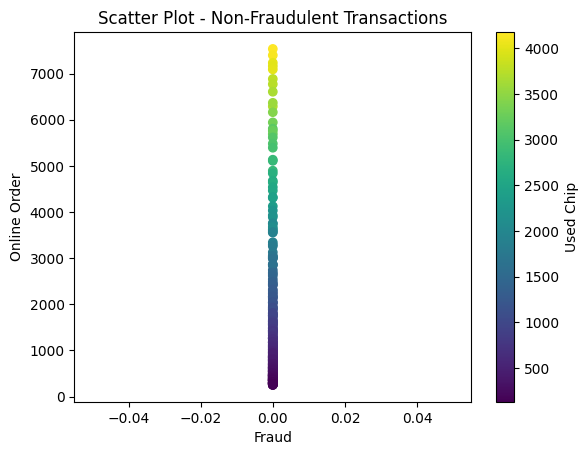

In [180]:
# Diagrama de dispersión para fraudulent_table
plt.scatter(fraudulent_table['fraud'], fraudulent_table['online_order'], c=fraudulent_table['used_chip'])
plt.xlabel('Fraud')
plt.ylabel('Online Order')
plt.title('Scatter Plot - Fraudulent Transactions')
plt.colorbar(label='Used Chip')
plt.show()

# Diagrama de dispersión para non_fraudulent_table
plt.scatter(non_fraudulent_table['fraud'], non_fraudulent_table['online_order'], c=non_fraudulent_table['used_chip'])
plt.xlabel('Fraud')
plt.ylabel('Online Order')
plt.title('Scatter Plot - Non-Fraudulent Transactions')
plt.colorbar(label='Used Chip')
plt.show()


### **ALERTA CONCLUSIÓN**:
- Al parecer todas las variables binarias, incluyendo al Fraude, tienen una correlación igual a la unidad

Comprobamos:

### FRAUDE VS ORDEN EN LINEA

In [193]:
corr_coef, p_value = pearsonr(fraudulent_table['fraud'], fraudulent_table['online_order'])
print("Coeficiente de Correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de Correlación lineal: 0.9999715397456272
Valor p: 0.0


### FRAUDE VS USO DE CHIP

In [194]:
corr_coef, p_value = pearsonr(fraudulent_table['fraud'], fraudulent_table['used_chip'])
print("Coeficiente de Correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de Correlación lineal: 0.9967407652877955
Valor p: 0.0


### USO DE CHIP VS ORDEN EN LINEA

In [195]:
corr_coef, p_value = pearsonr(fraudulent_table['used_chip'], fraudulent_table['online_order'])
print("Coeficiente de Correlación lineal:", corr_coef)
print("Valor p:", p_value)

Coeficiente de Correlación lineal: 0.9968919422626897
Valor p: 0.0


## Resultados y conclusiones


### Coeficientes de Correlación Lineal

Cuando el coeficiente de correlación lineal es igual a 1, significa que existe una relación lineal positiva perfecta entre las variables. Esto implica que a medida que aumenta el valor de una variable, la otra variable también aumenta en forma proporcional. La relación entre las variables es constante y predecible.

El valor p igual a 0 indica que la probabilidad de obtener una correlación tan fuerte entre las variables debido al azar es extremadamente baja. Un valor p de 0 significa que la correlación observada es altamente significativa y no se puede atribuir simplemente al azar. Por lo tanto, la ***Hipótesis Nula*** es rechazada y la ***Hipótesis Alternativa*** aceptada por nuestro modelo.


**CONCLUSIÓN DEL MODELO**:

1. Segun nuestra base de datos, los Indicadores (Orden en línea, Uso de chip) forman una relación lineal positiva perfecta con el **Fraude**
2. El **Fraude** puede ser predecido, sin fallo alguno, al conocer si una transacción fue hecha en línea o con el chip de la tarjeta.

Comparando los resultados de nuestro modelo con la Realidad, tenemos que rechazar la Hipótesis obtenida del modelo de Correlación Lineal. Ya que sabemos que los datos reales no pueden dar resultados como los visto en esta Base de Datos. Por lo que, nuestra conclusión final sería:

#### ***CONCLUSIÓN FINAL***: 
 *La Base de Datos utilizada para resolver el problema que planteamos al inicio no funciona. Inferimos que no fue tomada de una muestra real, como dice su DataSet, por lo que lo más probable es que haya sido creada con esos valores específicos para lograr que las variables binarias tengan esa Correlación Lineal perfecta con el FRAUDE.* 